# Entity Resolution System Evaluation

This notebook evaluates the performance of the entity resolution system. It loads the metrics, feature importance, test results, and other outputs from the pipeline and visualizes them for analysis.

In [1]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import yaml
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_auc_score, confusion_matrix,
    precision_recall_curve, roc_curve, auc
)

# Add parent directory to path
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
plt.style.use('fivethirtyeight')
%matplotlib inline

# Set up a better default figure size
plt.rcParams['figure.figsize'] = [12, 8]

## Load Configuration

In [9]:
# Load configuration
with open('../config.yml', 'r') as f:
    config = yaml.safe_load(f)

# Set output directory
output_dir = Path(config['system']['output_dir'])
figures_dir = output_dir / 'figures'
reports_dir = output_dir / 'reports'

# Check if output directory exists
if not output_dir.exists():
    print(f"Output directory {output_dir} does not exist. Run the pipeline first.")
else:
    print(f"Output directory: {output_dir}")

Output directory: ../output


## Load Pipeline Results

In [10]:
# Load pipeline results
pipeline_results_path = output_dir / 'pipeline_results.json'
if pipeline_results_path.exists():
    with open(pipeline_results_path, 'r') as f:
        pipeline_results = json.load(f)
    print(f"Pipeline results loaded from {pipeline_results_path}")
else:
    pipeline_results = {}
    print(f"Pipeline results not found at {pipeline_results_path}")

# Display pipeline results summary
if pipeline_results:
    print("\nPipeline Results Summary:\n")
    for stage, results in pipeline_results.items():
        if isinstance(results, dict):
            print(f"Stage: {stage}")
            for key, value in results.items():
                if isinstance(value, (int, float, str, bool)) or value is None:
                    print(f"  {key}: {value}")
            print()
        elif stage == 'total_duration':
            print(f"Total Duration: {results:.2f} seconds")
            print()

Pipeline results not found at ../output/pipeline_results.json


## Classification Metrics

In [11]:
# Load classification metrics
metrics_path = output_dir / 'classification_metrics.json'
if metrics_path.exists():
    with open(metrics_path, 'r') as f:
        metrics = json.load(f)
    print(f"Classification metrics loaded from {metrics_path}")
else:
    metrics = {}
    print(f"Classification metrics not found at {metrics_path}")

# Display performance metrics
if metrics:
    print("\nPerformance Metrics:\n")
    for metric, value in metrics.items():
        if metric not in ['confusion_matrix', 'feature_importance']:
            print(f"{metric}: {value:.4f}")
    
    # Display confusion matrix
    if 'confusion_matrix' in metrics:
        cm = metrics['confusion_matrix']
        print("\nConfusion Matrix:\n")
        print(f"True Negatives: {cm['true_negatives']}")
        print(f"False Positives: {cm['false_positives']}")
        print(f"False Negatives: {cm['false_negatives']}")
        print(f"True Positives: {cm['true_positives']}")
        
        # Calculate derived metrics
        total = cm['true_negatives'] + cm['false_positives'] + cm['false_negatives'] + cm['true_positives']
        accuracy = (cm['true_negatives'] + cm['true_positives']) / total if total > 0 else 0
        precision = cm['true_positives'] / (cm['true_positives'] + cm['false_positives']) if (cm['true_positives'] + cm['false_positives']) > 0 else 0
        recall = cm['true_positives'] / (cm['true_positives'] + cm['false_negatives']) if (cm['true_positives'] + cm['false_negatives']) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
        
        print("\nDerived Metrics:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        
        # Create confusion matrix visualization
        cm_array = np.array([
            [cm['true_negatives'], cm['false_positives']],
            [cm['false_negatives'], cm['true_positives']]
        ])
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm_array,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Non-Match', 'Match'],
            yticklabels=['Non-Match', 'Match']
        )
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()

Classification metrics loaded from ../output/classification_metrics.json

Performance Metrics:

accuracy: 0.9986
precision: 0.9973
recall: 1.0000
f1: 0.9986
roc_auc: 0.9993


TypeError: unsupported format string passed to NoneType.__format__

## Feature Importance Analysis

Top 15 Features by Importance:



,feature,weight,abs_weight,importance,feature_type
0,person_cosine,4.248401,4.248401,1.0,cosine
1,title_cosine,0.000000,0.000000,0.0,cosine
20,birth_death_match,0.000000,0.000000,0.0,match
19,birth_death_right,0.000000,0.000000,0.0,right
18,birth_death_left,0.000000,0.000000,0.0,left
17,title_subjects_ratio,0.000000,0.000000,0.0,ratio
16,title_subjects_product,0.000000,0.000000,0.0,product
15,composite_subjects_ratio,0.000000,0.000000,0.0,ratio
14,person_subjects_product,0.000000,0.000000,0.0,product
13,provision_subjects_harmonic,0.000000,0.000000,0.0,harmonic


/var/folders/hk/lvq3vkld1535ljtzsptfx4lc2_gfwg/T/ipykernel_93079/411388972.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=df_importance.head(15), palette='viridis')
/var/folders/hk/lvq3vkld1535ljtzsptfx4lc2_gfwg/T/ipykernel_93079/411388972.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='feature', data=df_importance.head(15), palette='viridis')


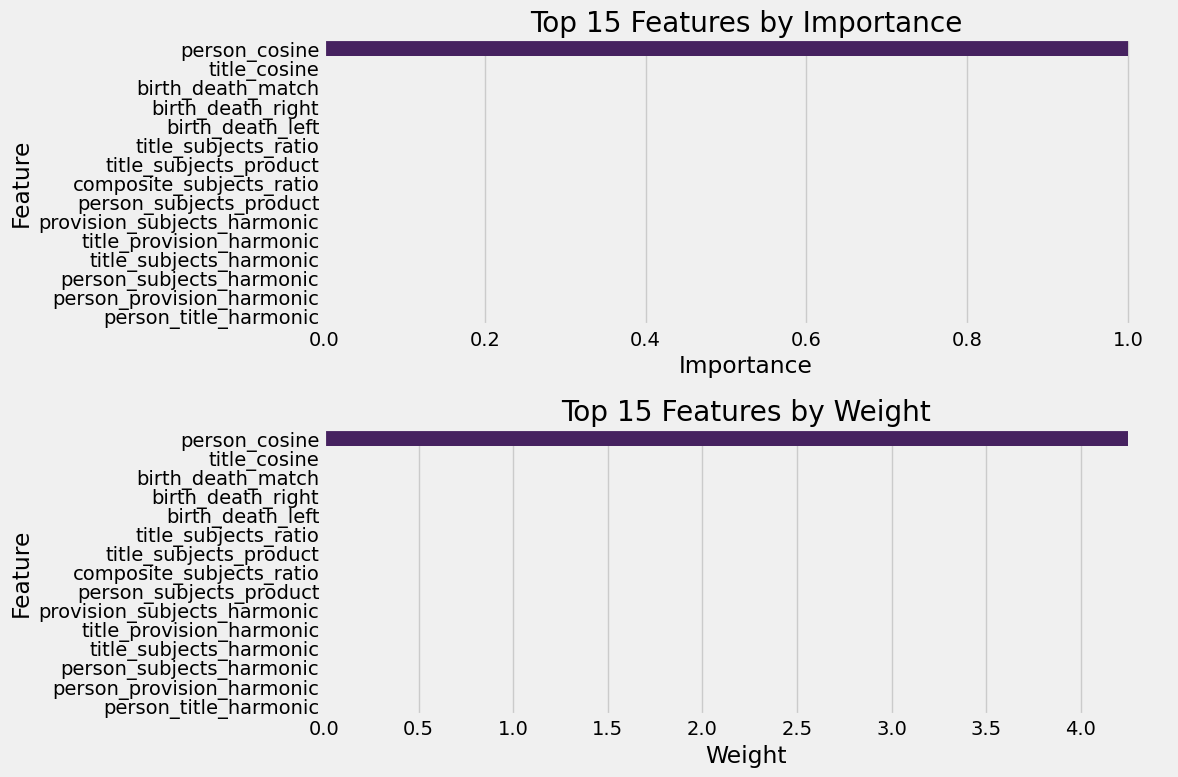


Feature Importance by Type:



,feature_type,importance
0,cosine,1.0
1,harmonic,0.0
2,left,0.0
3,levenshtein,0.0
4,match,0.0
5,penalty,0.0
6,product,0.0
7,ratio,0.0
8,right,0.0
9,squared,0.0


/var/folders/hk/lvq3vkld1535ljtzsptfx4lc2_gfwg/T/ipykernel_93079/411388972.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature_type', data=importance_by_type, palette='viridis')


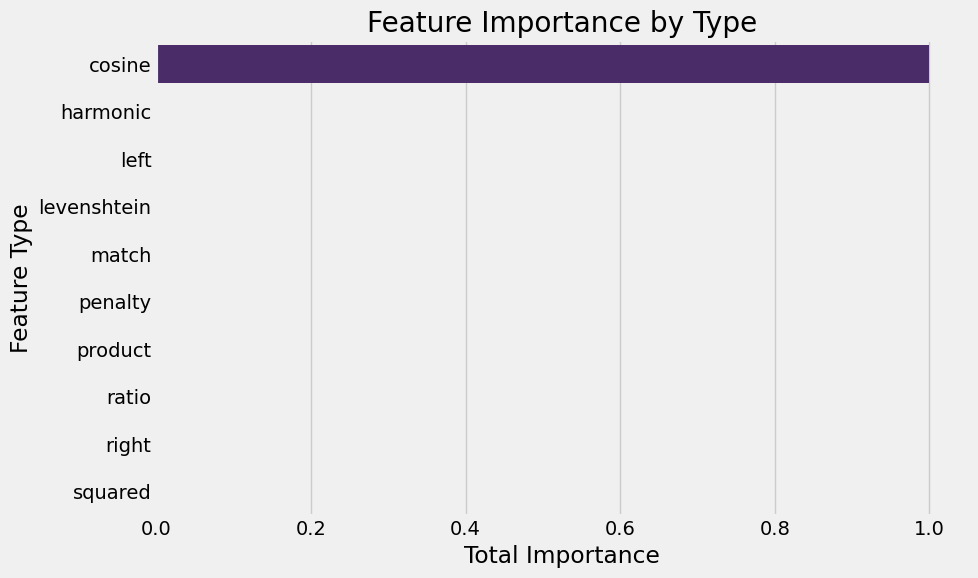


Feature importance analysis exported to ../output/feature_importance_analysis.xlsx


In [12]:
# Load feature importance
if metrics and 'feature_importance' in metrics:
    feature_importance = metrics['feature_importance']
    
    # Create DataFrame from feature importance
    rows = []
    for feature, details in feature_importance.items():
        # Extract feature type from name (e.g., person_cosine -> cosine)
        feature_type = feature.split('_')[-1] if '_' in feature else 'other'
        
        rows.append({
            'feature': feature,
            'weight': details['weight'],
            'abs_weight': details['abs_weight'],
            'importance': details['importance'],
            'feature_type': feature_type
        })
    
    df_importance = pd.DataFrame(rows)
    
    # Sort by importance
    df_importance = df_importance.sort_values('importance', ascending=False)
    
    # Display top features
    print("Top 15 Features by Importance:\n")
    display(df_importance.head(15))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    
    # Bar plot of feature importance
    plt.subplot(2, 1, 1)
    sns.barplot(x='importance', y='feature', data=df_importance.head(15), palette='viridis')
    plt.title('Top 15 Features by Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    
    # Bar plot of feature weights
    plt.subplot(2, 1, 2)
    sns.barplot(x='weight', y='feature', data=df_importance.head(15), palette='viridis')
    plt.title('Top 15 Features by Weight')
    plt.xlabel('Weight')
    plt.ylabel('Feature')
    plt.tight_layout()
    
    plt.show()
    
    # Group features by type
    importance_by_type = df_importance.groupby('feature_type')['importance'].sum().reset_index()
    importance_by_type = importance_by_type.sort_values('importance', ascending=False)
    
    # Display importance by feature type
    print("\nFeature Importance by Type:\n")
    display(importance_by_type)
    
    # Plot importance by feature type
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature_type', data=importance_by_type, palette='viridis')
    plt.title('Feature Importance by Type')
    plt.xlabel('Total Importance')
    plt.ylabel('Feature Type')
    plt.tight_layout()
    plt.show()
    
    # Export to Excel for further analysis
    excel_path = output_dir / "feature_importance_analysis.xlsx"
    with pd.ExcelWriter(excel_path) as writer:
        df_importance.to_excel(writer, sheet_name='Feature Importance', index=False)
        importance_by_type.to_excel(writer, sheet_name='Importance by Type', index=False)
    
    print(f"\nFeature importance analysis exported to {excel_path}")
else:
    print("Feature importance not found in metrics")

## Test Results Analysis

In [ ]:
# Load detailed test results
test_results_path = output_dir / 'test_results_detailed.csv'
if test_results_path.exists():
    test_df = pd.read_csv(test_results_path)
    print(f"Loaded {len(test_df)} test records from {test_results_path}")
    
    # Display basic statistics
    correct_count = len(test_df[test_df['correct']])
    accuracy = correct_count / len(test_df)
    
    print(f"\nTest Results Summary:")
    print(f"Total test instances: {len(test_df)}")
    print(f"Correct predictions: {correct_count} ({accuracy:.2%})")
    print(f"Incorrect predictions: {len(test_df) - correct_count} ({1-accuracy:.2%})")
    
    # Display sample of test results
    print("\nSample Test Results:")
    display(test_df.sample(5))
    
    # Calculate basic metrics
    try:
        precision = precision_score(test_df['true_label'], test_df['predicted_label'])
        recall = recall_score(test_df['true_label'], test_df['predicted_label'])
        f1 = f1_score(test_df['true_label'], test_df['predicted_label'])
        roc_auc = roc_auc_score(test_df['true_label'], test_df['confidence'])
        
        print("\nMetrics from Test Results:")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"ROC AUC: {roc_auc:.4f}")
    except Exception as e:
        print(f"Error calculating metrics: {e}")
    
    # Calculate confusion matrix
    try:  
        cm = confusion_matrix(test_df['true_label'], test_df['predicted_label'])
        
        # Create confusion matrix visualization
        plt.figure(figsize=(8, 6))
        sns.heatmap(
            cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Non-Match', 'Match'],
            yticklabels=['Non-Match', 'Match']
        )
        plt.title('Confusion Matrix from Test Results')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.show()
    except Exception as e:
        print(f"Error creating confusion matrix: {e}")
    
    # Analyze errors
    error_df = test_df[~test_df['correct']]
    false_positives = error_df[error_df['predicted_label'] == 1]
    false_negatives = error_df[error_df['predicted_label'] == 0]
    
    print("\nError Analysis:")
    print(f"Total errors: {len(error_df)}")
    print(f"False positives: {len(false_positives)}")
    print(f"False negatives: {len(false_negatives)}")
    
    # Plot confidence distribution
    plt.figure(figsize=(12, 6))
    
    # Create a new column for error type
    test_df['result'] = 'Correct'
    test_df.loc[(test_df['true_label'] == 0) & (test_df['predicted_label'] == 1), 'result'] = 'False Positive'
    test_df.loc[(test_df['true_label'] == 1) & (test_df['predicted_label'] == 0), 'result'] = 'False Negative'
    
    # Plot confidence distribution by result type
    sns.histplot(
        data=test_df,
        x='confidence',
        hue='result',
        multiple='stack',
        bins=20
    )
    plt.title('Confidence Distribution by Result Type')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.axvline(x=0.9, color='red', linestyle='--', label='Default Threshold (0.9)')
    plt.legend()
    plt.show()
    
    # Create precision-recall curve
    try:
        precision, recall, thresholds = precision_recall_curve(test_df['true_label'], test_df['confidence'])
        
        # Calculate F1 scores for each threshold
        f1_scores = [2 * p * r / (p + r) if p + r > 0 else 0 for p, r in zip(precision[:-1], recall[:-1])]
        best_threshold_idx = np.argmax(f1_scores)
        best_threshold = thresholds[best_threshold_idx]
        best_f1 = f1_scores[best_threshold_idx]
        
        plt.figure(figsize=(12, 6))
        plt.plot(recall, precision, 'b-', label='Precision-Recall curve')
        plt.scatter(recall[best_threshold_idx], precision[best_threshold_idx], color='red', s=100, 
                    label=f'Best F1 Threshold ({best_threshold:.2f}, F1={best_f1:.2f})')
        
        # Find closest point to current threshold
        current_threshold = 0.9  # Default threshold
        current_idx = np.argmin(np.abs(thresholds - current_threshold))
        plt.scatter(recall[current_idx], precision[current_idx], color='green', s=100, 
                    label=f'Current Threshold ({current_threshold:.2f})')
        
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend()
        plt.grid(True)
        plt.show()
        
        # Plot threshold analysis
        plt.figure(figsize=(12, 6))
        plt.plot(thresholds, precision[:-1], 'b-', label='Precision')
        plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
        plt.plot(thresholds, f1_scores, 'r-', label='F1 Score')
        plt.axvline(x=best_threshold, color='red', linestyle='--', label=f'Best F1 Threshold ({best_threshold:.2f})')
        plt.axvline(x=current_threshold, color='green', linestyle='--', label=f'Current Threshold ({current_threshold:.2f})')
        plt.xlabel('Threshold')
        plt.ylabel('Score')
        plt.title('Precision, Recall, and F1 Score vs Threshold')
        plt.legend()
        plt.grid(True)
        plt.show()
    except Exception as e:
        print(f"Error creating precision-recall curve: {e}")
    
    # Feature analysis for errors
    try:
        # Get feature columns (excluding metadata columns)
        feature_cols = [col for col in test_df.columns if col not in ['pair_id', 'left_id', 'right_id', 'true_label', 'predicted_label', 'confidence', 'correct', 'result']]
        
        if len(feature_cols) > 0:
            # Calculate average feature values for each result type
            feature_means = test_df.groupby('result')[feature_cols].mean()
            
            print("\nAverage Feature Values by Result Type:")
            display(feature_means)
            
            # Create barplot for top 5 features with highest variance across result types
            feature_variances = feature_means.var(axis=0).sort_values(ascending=False)
            top_features = feature_variances.index[:5].tolist()
            
            # Melt the dataframe for easier plotting
            feature_means_reset = feature_means.reset_index()
            feature_means_melted = pd.melt(feature_means_reset, id_vars=['result'], value_vars=top_features)
            
            plt.figure(figsize=(15, 8))
            sns.barplot(x='variable', y='value', hue='result', data=feature_means_melted)
            plt.title('Top Features by Result Type')
            plt.xlabel('Feature')
            plt.ylabel('Average Value')
            plt.xticks(rotation=45)
            plt.legend(title='Result')
            plt.tight_layout()
            plt.show()
            
            # Create boxplots for top features to see distributions
            for feature in top_features:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x='result', y=feature, data=test_df)
                plt.title(f'Distribution of {feature} by Result Type')
                plt.xlabel('Result')
                plt.ylabel(feature)
                plt.show()
    except Exception as e:
        print(f"Error analyzing features: {e}")
        import traceback
        traceback.print_exc()
    
    # Export error analysis for detailed review
    try:
        error_analysis_path = output_dir / "error_analysis_detailed.xlsx"
        with pd.ExcelWriter(error_analysis_path) as writer:
            false_positives.to_excel(writer, sheet_name='False Positives', index=False)
            false_negatives.to_excel(writer, sheet_name='False Negatives', index=False)
            
            # Include feature means
            if len(feature_cols) > 0:
                feature_means.to_excel(writer, sheet_name='Feature Means')
                
                # Create feature comparison for errors vs correct predictions
                feature_comparison = pd.DataFrame()
                for feature in feature_cols:
                    feature_comparison[feature] = [
                        test_df[test_df['correct']][feature].mean(),
                        false_positives[feature].mean(),
                        false_negatives[feature].mean()
                    ]
                
                feature_comparison.index = ['Correct', 'False Positive', 'False Negative']
                feature_comparison.to_excel(writer, sheet_name='Feature Comparison')
        
        print(f"\nError analysis exported to {error_analysis_path}")
    except Exception as e:
        print(f"Error exporting analysis: {e}")
else:
    print(f"Test results not found at {test_results_path}")

## Cluster Analysis

In [ ]:
# Load clusters CSV (preferred format for analysis)
clusters_csv_path = output_dir / 'clusters.csv'
if clusters_csv_path.exists():
    clusters_df = pd.read_csv(clusters_csv_path)
    print(f"Loaded {len(clusters_df)} cluster records from {clusters_csv_path}")
    
    # Basic cluster statistics
    cluster_count = clusters_df['cluster_id'].nunique()
    entity_count = len(clusters_df)
    avg_cluster_size = entity_count / cluster_count if cluster_count > 0 else 0
    
    print(f"\nCluster Statistics:")
    print(f"Total clusters: {cluster_count}")
    print(f"Total entities in clusters: {entity_count}")
    print(f"Average entities per cluster: {avg_cluster_size:.2f}")
    
    # Cluster size distribution
    cluster_sizes = clusters_df.groupby('cluster_id').size().reset_index(name='size')
    
    print("\nCluster Size Distribution:")
    size_counts = {
        '1': sum(1 for size in cluster_sizes['size'] if size == 1),
        '2': sum(1 for size in cluster_sizes['size'] if size == 2),
        '3-5': sum(1 for size in cluster_sizes['size'] if 3 <= size <= 5),
        '6-10': sum(1 for size in cluster_sizes['size'] if 6 <= size <= 10),
        '11-20': sum(1 for size in cluster_sizes['size'] if 11 <= size <= 20),
        '21+': sum(1 for size in cluster_sizes['size'] if size > 20)
    }
    
    for size_range, count in size_counts.items():
        print(f"{size_range}: {count} clusters ({count/cluster_count:.2%})")
    
    # Plot cluster size histogram
    plt.figure(figsize=(12, 6))
    plt.hist(cluster_sizes['size'], bins=20, color='skyblue', edgecolor='black')
    plt.title('Histogram of Cluster Sizes')
    plt.xlabel('Cluster Size')
    plt.ylabel('Number of Clusters')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot cluster size distribution (bar chart)
    plt.figure(figsize=(10, 6))
    plt.bar(size_counts.keys(), size_counts.values(), color='skyblue')
    plt.title('Cluster Size Distribution')
    plt.xlabel('Cluster Size Range')
    plt.ylabel('Number of Clusters')
    plt.grid(True, alpha=0.3, axis='y')
    plt.show()
    
    # Show top 10 largest clusters
    top_clusters = cluster_sizes.sort_values('size', ascending=False).head(10)
    
    print("\nTop 10 Largest Clusters:")
    display(top_clusters)
    
    # Plot top 10 largest clusters
    plt.figure(figsize=(12, 6))
    sns.barplot(x='cluster_id', y='size', data=top_clusters)
    plt.title('Top 10 Largest Clusters')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Entities')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    plt.show()
else:
    # Fall back to JSON file
    clusters_path = output_dir / 'clusters.json'
    if clusters_path.exists():
        with open(clusters_path, 'r') as f:
            clusters = json.load(f)
        
        print(f"Loaded {len(clusters)} clusters from {clusters_path}")
        
        # Calculate cluster sizes
        cluster_sizes = [len(cluster) for cluster in clusters]
        
        # Display basic statistics
        print(f"\nCluster Statistics:")
        print(f"Total clusters: {len(clusters)}")
        print(f"Total entities in clusters: {sum(cluster_sizes)}")
        print(f"Average entities per cluster: {np.mean(cluster_sizes):.2f}")
        print(f"Median entities per cluster: {np.median(cluster_sizes):.2f}")
        print(f"Largest cluster size: {max(cluster_sizes)}")
        print(f"Smallest cluster size: {min(cluster_sizes)}")
        
        # Create cluster size distribution
        print("\nCluster Size Distribution:")
        size_counts = {
            '1': sum(1 for size in cluster_sizes if size == 1),
            '2': sum(1 for size in cluster_sizes if size == 2),
            '3-5': sum(1 for size in cluster_sizes if 3 <= size <= 5),
            '6-10': sum(1 for size in cluster_sizes if 6 <= size <= 10),
            '11-20': sum(1 for size in cluster_sizes if 11 <= size <= 20),
            '21+': sum(1 for size in cluster_sizes if size > 20)
        }
        
        for size_range, count in size_counts.items():
            print(f"{size_range}: {count} clusters ({count/len(clusters):.2%})")
        
        # Plot cluster size histogram
        plt.figure(figsize=(12, 6))
        plt.hist(cluster_sizes, bins=20, color='skyblue', edgecolor='black')
        plt.title('Histogram of Cluster Sizes')
        plt.xlabel('Cluster Size')
        plt.ylabel('Number of Clusters')
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print(f"Clusters not found at {clusters_path}")

## Prediction Analysis (Full Dataset)

In [ ]:
# Load prediction results
prediction_csv_path = output_dir / 'prediction_results.csv'
if prediction_csv_path.exists():
    predictions_df = pd.read_csv(prediction_csv_path)
    print(f"Loaded {len(predictions_df)} prediction records from {prediction_csv_path}")
    
    # Basic statistics
    match_count = len(predictions_df[predictions_df['predicted_match']])
    non_match_count = len(predictions_df[~predictions_df['predicted_match']])
    match_percentage = match_count / len(predictions_df) if len(predictions_df) > 0 else 0
    
    print(f"\nPrediction Statistics:")
    print(f"Total predictions: {len(predictions_df)}")
    print(f"Predicted matches: {match_count} ({match_percentage:.2%})")
    print(f"Predicted non-matches: {non_match_count} ({1-match_percentage:.2%})")
    
    # Display sample of predictions
    print("\nSample Predictions:")
    display(predictions_df.sample(5))
    
    # Plot confidence distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(
        data=predictions_df,
        x='confidence',
        hue='predicted_match',
        multiple='stack',
        bins=20
    )
    plt.title('Confidence Distribution by Prediction')
    plt.xlabel('Confidence')
    plt.ylabel('Count')
    plt.axvline(x=0.9, color='red', linestyle='--', label='Decision Threshold (0.9)')
    plt.legend()
    plt.show()
    
    # Analyze average feature values for matches vs non-matches
    # Get feature columns (excluding metadata columns)
    feature_cols = [col for col in predictions_df.columns if col not in ['pair_id', 'left_id', 'right_id', 'predicted_match', 'confidence']]
    
    if len(feature_cols) > 0:
        # Calculate average feature values for matches and non-matches
        feature_means = predictions_df.groupby('predicted_match')[feature_cols].mean()
        
        print("\nAverage Feature Values by Prediction:")
        display(feature_means)
        
        # Create barplot for top 5 features with highest variance between match and non-match
        feature_variances = feature_means.var(axis=0).sort_values(ascending=False)
        top_features = feature_variances.index[:5].tolist()
        
        # Melt the dataframe for easier plotting
        feature_means_reset = feature_means.reset_index()
        feature_means_melted = pd.melt(feature_means_reset, id_vars=['predicted_match'], value_vars=top_features)
        
        plt.figure(figsize=(15, 8))
        sns.barplot(x='variable', y='value', hue='predicted_match', data=feature_means_melted)
        plt.title('Top Features by Prediction')
        plt.xlabel('Feature')
        plt.ylabel('Average Value')
        plt.xticks(rotation=45)
        plt.legend(title='Predicted Match')
        plt.tight_layout()
        plt.show()
        
        # Plot distributions for all top features
        for feature in top_features:
            plt.figure(figsize=(10, 6))
            sns.histplot(
                data=predictions_df,
                x=feature,
                hue='predicted_match',
                multiple='layer',
                bins=20
            )
            plt.title(f'Distribution of {feature} by Prediction')
            plt.xlabel(feature)
            plt.ylabel('Count')
            plt.legend(title='Predicted Match')
            plt.show()
    
    # Export prediction analysis
    prediction_analysis_path = output_dir / "prediction_analysis.xlsx"
    with pd.ExcelWriter(prediction_analysis_path) as writer:
        # Export match and non-match predictions separately
        predictions_df[predictions_df['predicted_match']].to_excel(writer, sheet_name='Matches', index=False)
        predictions_df[~predictions_df['predicted_match']].to_excel(writer, sheet_name='Non-Matches', index=False)
        
        # Export feature means
        if len(feature_cols) > 0:
            feature_means.to_excel(writer, sheet_name='Feature Means')
    
    print(f"\nPrediction analysis exported to {prediction_analysis_path}")
else:
    # Fall back to JSON file
    predictions_path = output_dir / 'predictions.json'
    if predictions_path.exists():
        with open(predictions_path, 'r') as f:
            predictions = json.load(f)
        
        print(f"Loaded {len(predictions)} predictions from {predictions_path}")
        
        # Calculate basic statistics
        match_count = sum(1 for p in predictions.values() if p.get('match', False))
        non_match_count = sum(1 for p in predictions.values() if not p.get('match', False))
        match_percentage = match_count / len(predictions) if len(predictions) > 0 else 0
        
        print(f"\nPrediction Statistics:")
        print(f"Total predictions: {len(predictions)}")
        print(f"Predicted matches: {match_count} ({match_percentage:.2%})")
        print(f"Predicted non-matches: {non_match_count} ({1-match_percentage:.2%})")
        
        # Extract confidence values
        confidence_values = [p.get('probability', 0) for p in predictions.values()]
        
        # Plot confidence distribution
        plt.figure(figsize=(12, 6))
        plt.hist(confidence_values, bins=20, color='skyblue', edgecolor='black')
        plt.title('Confidence Distribution')
        plt.xlabel('Confidence')
        plt.ylabel('Count')
        plt.axvline(x=0.9, color='red', linestyle='--', label='Decision Threshold (0.9)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print(f"Predictions not found at {predictions_path}")

## System Performance Summary

In [ ]:
# Generate a performance summary with evaluation insights

# Start with an empty summary
summary = {
    'classification': {},
    'features': {},
    'clusters': {},
    'runtime': {}
}

# Add classification metrics
if metrics:
    for metric, value in metrics.items():
        if metric not in ['confusion_matrix', 'feature_importance']:
            summary['classification'][metric] = value
    
    if 'confusion_matrix' in metrics:
        cm = metrics['confusion_matrix']
        total = cm['true_negatives'] + cm['false_positives'] + cm['false_negatives'] + cm['true_positives']
        summary['classification']['accuracy'] = (cm['true_negatives'] + cm['true_positives']) / total if total > 0 else 0
        summary['classification']['precision'] = cm['true_positives'] / (cm['true_positives'] + cm['false_positives']) if (cm['true_positives'] + cm['false_positives']) > 0 else 0
        summary['classification']['recall'] = cm['true_positives'] / (cm['true_positives'] + cm['false_negatives']) if (cm['true_positives'] + cm['false_negatives']) > 0 else 0
        summary['classification']['f1'] = 2 * summary['classification']['precision'] * summary['classification']['recall'] / (summary['classification']['precision'] + summary['classification']['recall']) if (summary['classification']['precision'] + summary['classification']['recall']) > 0 else 0

# Add feature importance info
if metrics and 'feature_importance' in metrics:
    feature_importance = metrics['feature_importance']
    
    # Get top 5 features
    top_features = list(feature_importance.keys())[:5]
    summary['features']['top_features'] = top_features
    
    # Group by feature type
    feature_types = {}
    for feature_name, details in feature_importance.items():
        feature_type = feature_name.split('_')[-1] if '_' in feature_name else 'other'
        if feature_type not in feature_types:
            feature_types[feature_type] = 0
        feature_types[feature_type] += details['importance']
    
    # Sort by importance
    feature_types = {k: v for k, v in sorted(feature_types.items(), key=lambda item: item[1], reverse=True)}
    
    # Add top 3 feature types
    summary['features']['top_feature_types'] = list(feature_types.keys())[:3]

# Add cluster statistics
clusters_csv_path = output_dir / 'clusters.csv'
if clusters_csv_path.exists():
    clusters_df = pd.read_csv(clusters_csv_path)
    
    # Basic cluster statistics
    cluster_count = clusters_df['cluster_id'].nunique()
    entity_count = len(clusters_df)
    avg_cluster_size = entity_count / cluster_count if cluster_count > 0 else 0
    
    summary['clusters']['total_clusters'] = cluster_count
    summary['clusters']['total_entities'] = entity_count
    summary['clusters']['avg_cluster_size'] = avg_cluster_size
    
    # Get largest clusters
    cluster_sizes = clusters_df.groupby('cluster_id').size().reset_index(name='size')
    largest_cluster = cluster_sizes['size'].max() if not cluster_sizes.empty else 0
    summary['clusters']['largest_cluster_size'] = largest_cluster

# Add runtime statistics
if pipeline_results:
    for stage, results in pipeline_results.items():
        if isinstance(results, dict) and 'duration' in results:
            summary['runtime'][stage] = results['duration']
    
    if 'total_duration' in pipeline_results:
        summary['runtime']['total'] = pipeline_results['total_duration']

# Display summary
print("\n===== ENTITY RESOLUTION SYSTEM PERFORMANCE SUMMARY =====\n")

# Classification performance
print("CLASSIFICATION PERFORMANCE:")
if summary['classification']:
    for metric, value in summary['classification'].items():
        if isinstance(value, (int, float)):
            print(f"  {metric.capitalize()}: {value:.4f}")
        else:
            print(f"  {metric.capitalize()}: {value}")
else:
    print("  No classification metrics available")

# Feature importance
print("\nFEATURE IMPORTANCE:")
if 'top_features' in summary['features']:
    print("  Top 5 Features:")
    for i, feature in enumerate(summary['features']['top_features'], 1):
        importance = feature_importance[feature]['importance']
        print(f"    {i}. {feature} ({importance:.4f})")
    
    print("\n  Top Feature Types:")
    for i, feature_type in enumerate(summary['features']['top_feature_types'], 1):
        print(f"    {i}. {feature_type}")
else:
    print("  No feature importance information available")

# Cluster statistics
print("\nCLUSTER STATISTICS:")
if summary['clusters']:
    print(f"  Total Clusters: {summary['clusters']['total_clusters']}")
    print(f"  Total Entities: {summary['clusters']['total_entities']}")
    print(f"  Average Cluster Size: {summary['clusters']['avg_cluster_size']:.2f}")
    print(f"  Largest Cluster Size: {summary['clusters']['largest_cluster_size']}")
else:
    print("  No cluster statistics available")

# Runtime statistics
print("\nRUNTIME STATISTICS:")
if summary['runtime']:
    for stage, duration in summary['runtime'].items():
        if stage != 'total':
            print(f"  {stage.capitalize()}: {duration:.2f} seconds")
    
    if 'total' in summary['runtime']:
        print(f"\n  Total Runtime: {summary['runtime']['total']:.2f} seconds")
else:
    print("  No runtime statistics available")

print("\n===== CONCLUSIONS =====\n")

# Provide some insights based on results
insights = []

# Classification performance insights
if 'precision' in summary['classification'] and 'recall' in summary['classification']:
    precision = summary['classification']['precision']
    recall = summary['classification']['recall']
    
    if precision > 0.9 and recall > 0.9:
        insights.append("The model shows excellent balance between precision and recall, indicating high-quality entity resolution.")
    elif precision > 0.9 and recall < 0.8:
        insights.append("The model prioritizes precision over recall, which is appropriate for applications requiring high confidence in matches.")
    elif precision < 0.8 and recall > 0.9:
        insights.append("The model prioritizes recall over precision, which is suitable for applications where finding all potential matches is critical.")
    elif precision < 0.7 or recall < 0.7:
        insights.append("The model shows room for improvement in classification performance. Consider refining features or model parameters.")

# Feature importance insights
if 'top_features' in summary['features'] and 'top_feature_types' in summary['features']:
    top_feature = summary['features']['top_features'][0]
    top_type = summary['features']['top_feature_types'][0]
    
    insights.append(f"The most influential feature is '{top_feature}', and the most important feature type is '{top_type}'.")
    
    if 'cosine' in top_type:
        insights.append("Vector similarity (cosine) features are dominant, indicating that the embedding model is effectively capturing semantic relationships.")
    elif 'jaro_winkler' in top_type or 'levenshtein' in top_type:
        insights.append("String similarity features are dominant, suggesting that direct text comparisons are more effective than semantic embeddings for this dataset.")
    elif 'harmonic' in top_type:
        insights.append("Interaction features (harmonic means) are dominant, highlighting the importance of considering relationships between different fields.")

# Cluster insights
if 'total_clusters' in summary['clusters'] and 'avg_cluster_size' in summary['clusters']:
    avg_size = summary['clusters']['avg_cluster_size']
    
    if avg_size < 2:
        insights.append("The majority of clusters contain only a single entity, indicating either high precision in entity resolution or a dataset with few true duplicates.")
    elif avg_size > 5:
        insights.append("The relatively large average cluster size suggests either many duplicate records per entity or potential over-merging in the clustering algorithm.")

# Print insights
for insight in insights:
    print(f"• {insight}")

if not insights:
    print("Insufficient data for generating insights. Run the complete pipeline to get more comprehensive insights.")